# Simulador de daltonismo

Bruna Kimura e Elisa Malzoni


###### Introdução


Este primeiro projeto consiste em simular em imagens como um daltônico (protanopia e deuteranopia) as veriam. Para tanto foi utilizado como base o artigo _Digital Video Colourmaps for Checkinh the Legibility of Displays by Dichromats_ de Viénot, Brettel e Mollon.

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

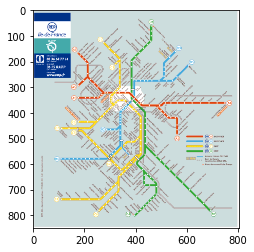

In [2]:
img = cv2.imread('normal.png')

# invertendo as componentes de cor BGR para RGB
img = img[:, :, ::-1]
plt.imshow(img)

## Simulador de protanopia e deuteranopia

### Passo 1:


In [102]:
new_img = (img / 255.0) ** 2.2

### Passo 2:
Tendo os valores em RGB, o primeiro passo é ajustar o fluxo RGB

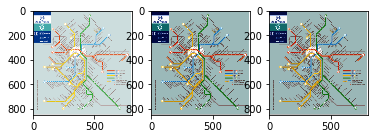

In [103]:
pro_img = (new_img * 0.992052) + 0.003974
deu_img = (new_img * 0.957237) + 0.0213814

# pro_img = np.uint8((img * 0.992052) + 0.003974)
# deu_img = np.uint8((img * 0.957237) + 0.0213814)

f, axarr = plt.subplots(1,3)

axarr[0].imshow(img)
axarr[1].imshow(pro_img)
axarr[2].imshow(deu_img)


As imagens acima representam a imagem normal, imagem com ajuste de fluxo para protanopia e deuteranopia respectivamente.

### Passo 3:
Transformar o RGB em sinais LMS

Teste professor

In [ ]:
pro_img.shape

In [ ]:
img_teste = np.arange(24).reshape((3, 4, 2))
img_teste[:,:,0]

In [ ]:
img_teste[:,:,1]

In [ ]:
img_teste

In [ ]:
np.rollaxis(img_teste, 0, 2)

In [ ]:
img_teste_reshape = np.matmul([[10, 0], [0, 1]], np.reshape(np.swapaxes(img_teste, 0, 2), (2, 12)))
np.swapaxes(np.reshape(img_teste_reshape, (2, 4, 3)), 0, 2)

### 3.1 RGB to LMS

In [104]:
RGB_to_LMS = np.array([[17.8824, 43.5161, 4.11935],
                       [3.45565, 27.1554, 3.86714],
                       [0.0299566, 0.184309, 1.46709]])

In [105]:
pro_array = np.array([pro_img[:,:,0].ravel(), pro_img[:,:,1].ravel(), pro_img[:,:,2].ravel()])
deu_array = np.array([deu_img[:,:,0].ravel(), deu_img[:,:,1].ravel(), deu_img[:,:,2].ravel()])

In [106]:
deu_array.shape

(3, 681747)

In [107]:
LMS_pro = np.matmul(RGB_to_LMS, pro_array)
LMS_deu = np.matmul(RGB_to_LMS, deu_array)

### 3.2 Outra forma

In [ ]:
#tranformando RGB em XYZ usando função python
pro_XYZ = cv2.cvtColor(pro_img, cv2.COLOR_RGB2XYZ)
pro_XYZ.shape

In [ ]:
print(pro_XYZ[0,0,:])

In [ ]:
XYZ_to_LMS = np.array([[0.15514, 0.54312, -0.03286],
                       [-0.15514, 0.45684, 0.03286],
                       [0, 0, 0.01608]])

### Passo 4:


In [108]:
matrix_pro = np.array([[0, 2.02344, -2.52581],
                       [0, 1, 0],
                       [0, 0, 1]])

matrix_deu = np.array([[1, 0, 0],
                       [0.494207, 0, 1.24827],
                       [0, 0, 1]])

In [109]:
LMS_pro_trans = np.matmul(matrix_pro, LMS_pro)
LMS_deu_trans = np.matmul(matrix_deu, LMS_deu)
LMS_pro_trans

array([[65.25739639, 65.25739639, 65.25739639, ..., 65.25739639,
        65.25739639, 65.25739639],
       [34.34117367, 34.34117367, 34.34117367, ..., 34.34117367,
        34.34117367, 34.34117367],
       [ 1.67467389,  1.67467389,  1.67467389, ...,  1.67467389,
         1.67467389,  1.67467389]])

## Passo 5

In [110]:
inv_RGB_to_LMS = ([[0.080944, -0.130504, 0.116721],
                   [-0.0102485, 0.0540194, -0.113615],
                   [-0.000365294, -0.00412163, 0.69353]])

In [111]:
RGB_pro = np.matmul(inv_RGB_to_LMS, LMS_pro_trans)
RGB_deu = np.matmul(inv_RGB_to_LMS, LMS_deu_trans)
RGB_pro

array([[0.99600378, 0.99600378, 0.99600378, ..., 0.99600378, 0.99600378,
        0.99600378],
       [0.9960311 , 0.9960311 , 0.9960311 , ..., 0.9960311 , 0.9960311 ,
        0.9960311 ],
       [0.99605684, 0.99605684, 0.99605684, ..., 0.99605684, 0.99605684,
        0.99605684]])

In [112]:
rows, cols, colors = img.shape

In [120]:
R_pro = np.reshape(RGB_pro[0,:], (rows, cols))
G_pro = np.reshape(RGB_pro[1,:], (rows, cols))
B_pro = np.reshape(RGB_pro[2,:], (rows, cols))

R_deu = np.reshape(RGB_deu[0,:], (rows, cols))
G_deu = np.reshape(RGB_deu[1,:], (rows, cols))
B_deu = np.reshape(RGB_deu[2,:], (rows, cols))

In [121]:
pro = np.dstack((R_pro, G_pro, B_pro))

In [122]:
deu = np.dstack((R_deu, G_deu, B_deu))

In [123]:
pro.shape
deu.shape

(849, 803, 3)

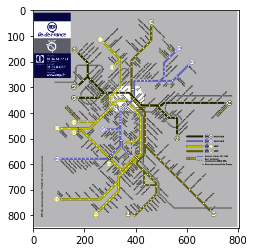

In [124]:
plt.imshow(pro)

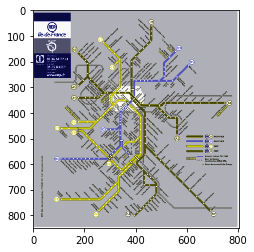

In [125]:
plt.imshow(deu)

## Passo 6

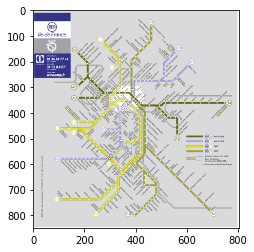

In [126]:
final_pro = np.uint8(255 * pro**(1/2.2))
final_deu = np.uint8(255 * deu**(1/2.2))
plt.imshow(final_pro)

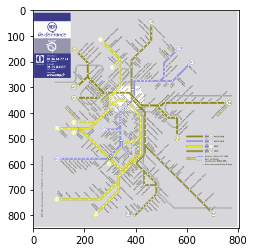

In [127]:
plt.imshow(final_deu)

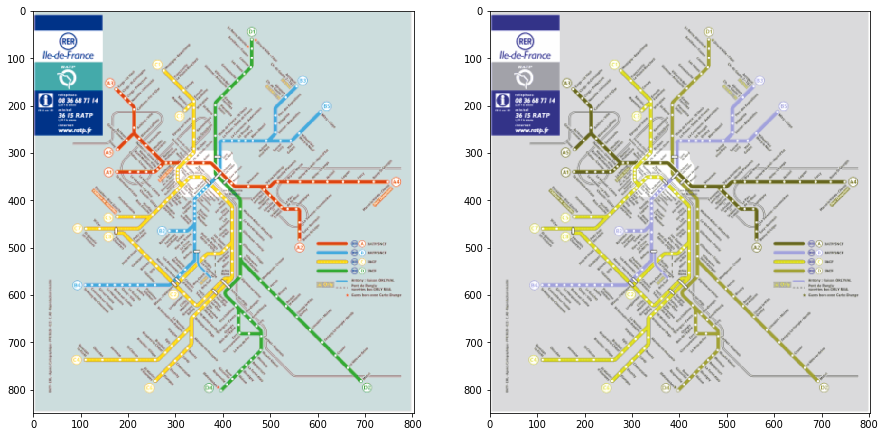

In [137]:
ori_pro = cv2.imread('protan.png')[:, :, ::-1]
ori_deu = cv2.imread('deutan.png')[:, :, ::-1]

f, axarr = plt.subplots(1,2)

f.set_figheight(15)
f.set_figwidth(15)


axarr[0].imshow(img)
axarr[1].imshow(final_pro)


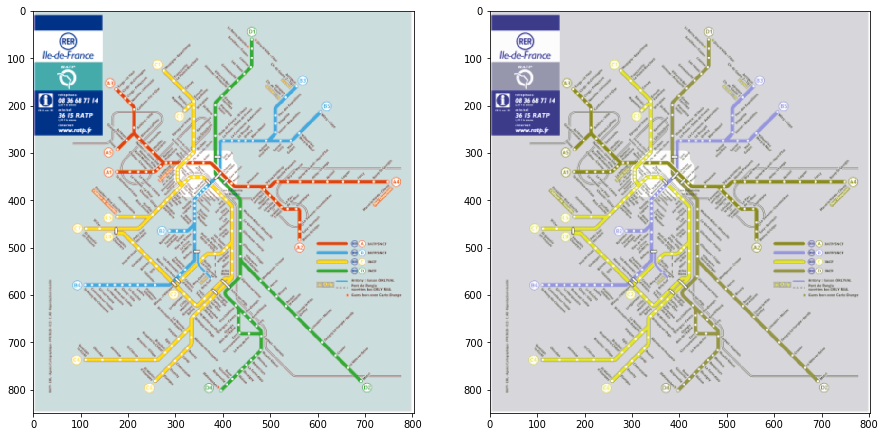

In [135]:
f, axarr = plt.subplots(1,2)

f.set_figheight(15)
f.set_figwidth(15)

axarr[0].imshow(img)
axarr[1].imshow(final_deu)

## Validação


#### Como validar esses resultados? Como sabemos que esse simulador realmente representa a experiência sensorial de uma pessoa com daltonismo?

Pra validar esses resultados pode-se comparar as imagens geradas com as imagens do dadas pelo artigo. Porém, neste caso não é possível saber se as imagens do artigo estão realmente corretas. 

Portanto, uma outra alternativa seria testar com pessoas com esses tipos de daltonismo, protanopia e deuteranopia. O teste consiste basicamente, em pedir para que essas pessoas olhem a imagem original ao lado da imagem simulada e respondam se vêem alguma diferença entre as duas imagens. Caso a diferença na imagem não seja percebida, isso significa que o simulador foi bem-sucedido.

Um outro método de validação, poderia ser usar uma imagem de teste de daltonismo, onde os daltônicos vêem determinados números e quem não possui daltonismo vê outro. Dessa forma, é preciso aplicar as técnicas acima e ver o resultado da imagem e confirmar se é possível identificar o número que um daltônico veria. 

Por fim, uma outra forma seria utilizar um filtro que mostrasse como um daltônico vê, e comparar com o tratamento de imagem feito acima.

Após a validação, para realmente ser possível representar a experiência sensorial de uma pessoa com daltonismo uma das formas é utilizar a câmera (webcam) para simular como um daltônico veria. Outra forma, é utilizar ferramentas de realidade virtual para simular o daltonismo.




## Aplicações